<a href="https://colab.research.google.com/github/rachitjindal56/MetaData-Datacreation/blob/main/MetaData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task-1 (Reading Image Metadata)

In [398]:
# Mounting google drive to google colab where the files exists
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [399]:
# Importing os-> for file path handling, Pillow-> reading image and extracting metadata 
# using exif. TAGS for finding tags from id extracted
import os
from PIL import Image
from PIL.ExifTags import TAGS

In [400]:
# Finding the path of current working directory and root to the image file location
# ./content/drive/MyDrive/AirProbe/
path = os.getcwd()
os.listdir(path)

['.config', 'drive', 'sample_data']

In [401]:
# Printing the names of the files present in the dataset
files = os.path.join(path,"drive/MyDrive/AirProbe")
os.listdir(files)

['germany-english-garden_10.jpg',
 'taiwan-jiufen_15.jpg',
 'japan-katsura-river_24.jpg',
 'italy-garda-lake-sailing-club_18.jpg',
 'irland-dingle_9.jpg',
 'turkey-bodrum_5.jpg',
 'germany-allgaeu-fliegenpilz_4.jpg',
 'germany-garching-heide_7.jpg',
 'england-london-bridge_2.jpg',
 'DSCN0010_21.jpg']

In [402]:
# Global dictionary for storing metadata
data = {}

# Iterating over the images in the dataset
for images in os.listdir(files):

  # Reading the images using pillow library
  img = Image.open(os.path.join(files,images))

  # Extracting the Metadata tag id's
  meta_data_id = img.getexif()

  data_meta = []

  # Iterating over the id's to find the tag named associated and finding 
  # the respective Metadata 
  for _id in meta_data_id:

    # Tag name
    tag = TAGS.get(_id,_id)
    # Tag Metadata of image
    meta_data = meta_data_id.get(_id)

    # Try if the data in bytes
    try:
      if isinstance(meta_data,bytes):
        meta_data = meta_data.decode()

    # If unable to decode utf-8 ignore
    except:
      meta_data = ""

    # Appending into the temporary variable data_meta
    data_meta.append([tag,meta_data])
  
  # Storing the data into dictionary
  data[images] = data_meta

In [403]:
data.values()

dict_values([[['ExifVersion', '0220'], ['ComponentsConfiguration', '\x01\x02\x03\x00'], ['ShutterSpeedValue', (847, 100)], ['DateTimeOriginal', '2018:11:04 12:09:44'], ['DateTimeDigitized', '2018:11:04 12:09:44'], ['ApertureValue', (170, 100)], ['BrightnessValue', (617, 100)], ['ExposureBiasValue', (0, 6)], ['MaxApertureValue', (170, 100)], ['SubjectDistance', (1560, 1000)], ['MeteringMode', 2], ['Flash', 16], ['FocalLength', (4442, 1000)], ['ColorSpace', 1], ['ExifImageWidth', 4032], ['SceneCaptureType', 0], ['SubsecTime', '694786'], ['SubsecTimeOriginal', '694786'], ['SubsecTimeDigitized', '694786'], ['ExifImageHeight', 3024], ['SubjectDistanceRange', 2], ['Make', 'Google'], ['Model', 'Pixel 2'], ['SensingMethod', 2], ['Orientation', 1], ['YCbCrPositioning', 1], ['ExposureTime', (2821, 1000000)], ['XResolution', (300, 1)], ['YResolution', (300, 1)], ['FNumber', (180, 100)], ['SceneType', '\x01'], ['ExposureProgram', 2], ['GPSInfo', {0: b'\x02\x02\x00\x00', 1: 'N', 2: ((48, 1), (8, 1)

# Task-2 (Generate Excel Sheet)

In [404]:
# Importing necessary library i.e, pandas->for dataframe,
# numpy->for array and maths and os->for file path handling
import pandas as pd
import numpy as np
import os

In [405]:
# Printing the names of the files present in the dataset
files = os.path.join(path,"drive/MyDrive/AirProbe")
os.listdir(files)

['germany-english-garden_10.jpg',
 'taiwan-jiufen_15.jpg',
 'japan-katsura-river_24.jpg',
 'italy-garda-lake-sailing-club_18.jpg',
 'irland-dingle_9.jpg',
 'turkey-bodrum_5.jpg',
 'germany-allgaeu-fliegenpilz_4.jpg',
 'germany-garching-heide_7.jpg',
 'england-london-bridge_2.jpg',
 'DSCN0010_21.jpg']

In [406]:
# Dictioanry for storing id and name of the image {image_name : id}
id_image = {}

for image in os.listdir(files):

  # Image names are in format name_id.jpeg
  # splitting the name about "_" and "."
  id = image.split("_")[-1].split(".")[0]
  id_image[image] = int(id)

# Printing the dictionary
print(id_image)

{'germany-english-garden_10.jpg': 10, 'taiwan-jiufen_15.jpg': 15, 'japan-katsura-river_24.jpg': 24, 'italy-garda-lake-sailing-club_18.jpg': 18, 'irland-dingle_9.jpg': 9, 'turkey-bodrum_5.jpg': 5, 'germany-allgaeu-fliegenpilz_4.jpg': 4, 'germany-garching-heide_7.jpg': 7, 'england-london-bridge_2.jpg': 2, 'DSCN0010_21.jpg': 21}


In [407]:
# Checking the length of the keys
len(data.keys())

10

In [417]:
# DataFrame -> ( Imagename , Resized Image, Rotated Image, MetadataInfo)
# initializing pandas dataframe with 0, and index = [0,24]

df = pd.DataFrame(0,index=np.arange(0,max(id_image.values())+1),columns=['Image_name','Resized Image','Rotated Image','MetadataInfo'])
df.style.set_properties(subset=["Image_name"], **{'text-align': 'center'})
df.head()

,Image_name,Resized Image,Rotated Image,MetadataInfo
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0


In [418]:
# Shape of the dataframe
df.shape

(25, 4)

In [419]:
# Assigning the Image_name to the row with its id
for image, id in id_image.items():
  df['Image_name'][id] = image

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [420]:
df.head()

,Image_name,Resized Image,Rotated Image,MetadataInfo
0,0,0,0,0
1,0,0,0,0
2,england-london-bridge_2.jpg,0,0,0
3,0,0,0,0
4,germany-allgaeu-fliegenpilz_4.jpg,0,0,0


In [425]:
# Preparing the data to be fed in to MetadataInfo column

# meta_tokens stores the {image_name : metadata}
meta_tokens = {}

# Iterating over the metadata dictionary create in Task-1
for key, value in data.items():

  # Stroing the list of the tag and the values in the ls list
  ls = data[key]
  temp = []

  # Iterating the list to join all the tag and the values associated with it 
  for tag in ls:
    temp.append(str(tag[0])+": "+str(tag[1]))
    
  # Storing the data in the dictionary
  meta_tokens[key] = temp
  
# The final form of metadata is stored in metadatainfo
metadatainfo = {}
for keys,values in meta_tokens.items():
  metadatainfo[keys] = "\n".join(values)

In [430]:
metadatainfo

{'DSCN0010_21.jpg': "ExifVersion: 0220                     ComponentsConfiguration: \x01\x02\x03\x00                     FlashPixVersion: 0100                     DateTimeOriginal: 2008:10:22 16:28:39                     DateTimeDigitized: 2008:10:22 16:28:39                     ExposureBiasValue: (0, 10)                     MaxApertureValue: (29, 10)                     MeteringMode: 5                     LightSource: 0                     Flash: 16                     FocalLength: (24, 1)                     UserComment: ASCII\x00\x00\x00                                                                                                                     \x00                     ColorSpace: 1                     ExifImageWidth: 640                     ExifInteroperabilityOffset: 896                     SceneCaptureType: 0                     ExifImageHeight: 480                     Contrast: 0                     Saturation: 0                     Sharpness: 0                     Subjec

In [426]:
# Inserting the values in the dataframe 
for keys, values in metadatainfo.items():
  df['MetadataInfo'][df['Image_name'] == keys] = values

In [431]:
# Importing the modules
import glob
import random
import base64
from io import BytesIO
from IPython.display import HTML

# This function is for the unrotated image, it takes the path of the image file and returns
# the thumbnail of the image
def get_thumbnail_unrotated(path):

    # Handling the indices that are not present
    if path == "":
      return ""

    # Reads the image, resize it into (512x512) size
    # and returns the image in form of a thumbnail
    i = Image.open(path)
    i = i.resize(size=(512,512))
    i.thumbnail((512, 512), Image.LANCZOS)
    return i

# It handle the thumbnail and saves the image
def image_base64_unrotated(im):
    if isinstance(im, str):
        im = get_thumbnail_unrotated(im)
    with BytesIO() as buffer:
        im.save(buffer, 'jpeg')
        return base64.b64encode(buffer.getvalue()).decode()

# HTML formatter for converting the files into the urls
def image_formatter_unrotated(im):
    if im == "":
      return 0
    return f'<img src="data:image/jpeg;base64,{image_base64_unrotated(im)}">'


# This function is for the rotated image, it takes the path of the image file and returns
# the thumbnail of the image
def get_thumbnail_rotated(path):

    # Handling the indices that are not present
    if path == "":
      return ""

    # Reads the image, resize it into (512x512) size, rotate it
    # -90 degeree (clockwise) 
    # and returns the image in form of a thumbnail
    i = Image.open(path)
    i = i.resize(size=(512,512))
    i = i.rotate(angle=-90)
    i.thumbnail((512, 512), Image.LANCZOS)
    return i

# It handle the thumbnail and saves the image
def image_base64_rotate(im):
    if isinstance(im, str):
        im = get_thumbnail_rotated(im)
    with BytesIO() as buffer:
        im.save(buffer, 'jpeg')
        return base64.b64encode(buffer.getvalue()).decode()

# HTML formatter for converting the files into the urls
def image_formatter_rotated(im):
    if im == "":
      return 0
    return f'<img src="data:image/jpeg;base64,{image_base64_rotate(im)}">'

def contradiction(id):
  if id == 0:
    return ""
  return f'../content/drive/MyDrive/AirProbe/{id}'


# Saving the file path of the images
df['file_1'] = df.Image_name.map(lambda id: contradiction(id))

# converting the path of the image to the HTML tag for rotated and 
# unrotated image
df['Resized Image'] = df.file_1.map(lambda f: get_thumbnail_unrotated(f))
df['Rotated Image'] = df.file_1.map(lambda f: get_thumbnail_rotated(f))
df.head()

,Image_name,Resized Image,Rotated Image,MetadataInfo,file_1
0,0,,,0,
1,0,,,0,
2,england-london-bridge_2.jpg,<PIL.Image.Image image mode=RGB size=512x512 at 0x7FC161D72690>,<PIL.Image.Image image mode=RGB size=512x512 at 0x7FC161D306D0>,"ExifVersion: 0220 ComponentsConfiguration:   ShutterSpeedValue: (1171, 100) DateTimeOriginal: 2018:08:22 13:13:41 DateTimeDigitized: 2018:08:22 13:13:41 ApertureValue: (170, 100) BrightnessValue: (882, 100) ExposureBiasValue: (0, 6) MaxApertureValue: (170, 100) SubjectDistance: (1835, 1000) MeteringMode: 2 Flash: 16 FocalLength: (4442, 1000) ColorSpace: 1 ExifImageWidth: 4032 SceneCaptureType: 0 SubsecTime: 594779 SubsecTimeOriginal: 594779 SubsecTimeDigitized: 594779 ExifImageHeight: 3024 SubjectDistanceRange: 2 ImageLength: 3024 Make: Google SensingMethod: 2 Model: Pixel 2 Orientation: 1 ExposureTime: (299, 1000000) ExifInteroperabilityOffset: 20434 YCbCrPositioning: 1 FNumber: (180, 100) SceneType:  XResolution: (72, 1) YResolution: (72, 1) ExposureProgram: 2 GPSInfo: {0: b'\x02\x02\x00\x00', 1: 'N', 2: ((51, 1), (30, 1), (1478, 100)), 3: 'W', 4: ((0, 1), (4, 1), (2847, 100)), 5: b'\x00', 6: (7788, 100), 7: ((12, 1), (13, 1), (40, 1)), 11: (11965, 1000), 27: b'ASCII\x00\x00\x00fused', 29: '2018:08:22'} CustomRendered: 1 ISOSpeedRatings: 75 ResolutionUnit: 2 ExposureMode: 0 FlashPixVersion: 0100 ImageWidth: 4032 WhiteBalance: 0 Software: HDR+ 1.0.199571065z DateTime: 2018:08:22 13:13:41 DigitalZoomRatio: (0, 1) FocalLengthIn35mmFilm: 27 Contrast: 0 Saturation: 0 Sharpness: 0 ExifOffset: 241 MakerNote:",../content/drive/MyDrive/AirProbe/england-london-bridge_2.jpg
3,0,,,0,
4,germany-allgaeu-fliegenpilz_4.jpg,<PIL.Image.Image image mode=RGB size=512x512 at 0x7FC161D72150>,<PIL.Image.Image image mode=RGB size=512x512 at 0x7FC161D40190>,"ExifVersion: 0220 ComponentsConfiguration:   ShutterSpeedValue: (697, 100) DateTimeOriginal: 2018:09:30 13:43:42 DateTimeDigitized: 2018:09:30 13:43:42 ApertureValue: (170, 100) BrightnessValue: (275, 100) ExposureBiasValue: (0, 6) MaxApertureValue: (170, 100) SubjectDistance: (125, 1000) MeteringMode: 2 Flash: 16 FocalLength: (4442, 1000) ColorSpace: 1 ExifImageWidth: 3024 SceneCaptureType: 0 SubsecTime: 470288 SubsecTimeOriginal: 470288 SubsecTimeDigitized: 470288 ExifImageHeight: 4032 SubjectDistanceRange: 1 ImageLength: 4032 Make: Google SensingMethod: 2 Model: Pixel 2 Orientation: 1 ExposureTime: (7993, 1000000) ExifInteroperabilityOffset: 22264 YCbCrPositioning: 1 FNumber: (180, 100) SceneType:  XResolution: (72, 1) YResolution: (72, 1) ExposureProgram: 2 GPSInfo: {0: b'\x02\x02\x00\x00', 1: 'N', 2: ((47, 1), (28, 1), (86, 100)), 3: 'E', 4: ((10, 1), (12, 1), (1350, 100)), 5: b'\x00', 6: (160174, 100), 7: ((11, 1), (43, 1), (42, 1)), 11: (24656, 1000), 27: b'ASCII\x00\x00\x00fused', 29: '2018:09:30'} CustomRendered: 1 ISOSpeedRatings: 188 ResolutionUnit: 2 ExposureMode: 0 FlashPixVersion: 0100 ImageWidth: 3024 WhiteBalance: 0 Software: HDR+ 1.0.199571065z DateTime: 2018:09:30 13:43:42 DigitalZoomRatio: (0, 1) FocalLengthIn35mmFilm: 27 Contrast: 0 Saturation: 0 Sharpness: 0 ExifOffset: 241 MakerNote:",../content/drive/MyDrive/AirProbe/germany-allgaeu-fliegenpilz_4.jpg


,Image_name,Resized Image,Rotated Image,MetadataInfo
0,0,0,0,0
1,0,0,0,0
2,england-london-bridge_2.jpg,,,"ExifVersion: 0220 ComponentsConfiguration:   ShutterSpeedValue: (1171, 100) DateTimeOriginal: 2018:08:22 13:13:41 DateTimeDigitized: 2018:08:22 13:13:41 ApertureValue: (170, 100) BrightnessValue: (882, 100) ExposureBiasValue: (0, 6) MaxApertureValue: (170, 100) SubjectDistance: (1835, 1000) MeteringMode: 2 Flash: 16 FocalLength: (4442, 1000) ColorSpace: 1 ExifImageWidth: 4032 SceneCaptureType: 0 SubsecTime: 594779 SubsecTimeOriginal: 594779 SubsecTimeDigitized: 594779 ExifImageHeight: 3024 SubjectDistanceRange: 2 ImageLength: 3024 Make: Google SensingMethod: 2 Model: Pixel 2 Orientation: 1 ExposureTime: (299, 1000000) ExifInteroperabilityOffset: 20434 YCbCrPositioning: 1 FNumber: (180, 100) SceneType:  XResolution: (72, 1) YResolution: (72, 1) ExposureProgram: 2 GPSInfo: {0: b'\x02\x02\x00\x00', 1: 'N', 2: ((51, 1), (30, 1), (1478, 100)), 3: 'W', 4: ((0, 1), (4, 1), (2847, 100)), 5: b'\x00', 6: (7788, 100), 7: ((12, 1), (13, 1), (40, 1)), 11: (11965, 1000), 27: b'ASCII\x00\x00\x00fused', 29: '2018:08:22'} CustomRendered: 1 ISOSpeedRatings: 75 ResolutionUnit: 2 ExposureMode: 0 FlashPixVersion: 0100 ImageWidth: 4032 WhiteBalance: 0 Software: HDR+ 1.0.199571065z DateTime: 2018:08:22 13:13:41 DigitalZoomRatio: (0, 1) FocalLengthIn35mmFilm: 27 Contrast: 0 Saturation: 0 Sharpness: 0 ExifOffset: 241 MakerNote:"
3,0,0,0,0
4,germany-allgaeu-fliegenpilz_4.jpg,,,"ExifVersion: 0220 ComponentsConfiguration:   ShutterSpeedValue: (697, 100) DateTimeOriginal: 2018:09:30 13:43:42 DateTimeDigitized: 2018:09:30 13:43:42 ApertureValue: (170, 100) BrightnessValue: (275, 100) ExposureBiasValue: (0, 6) MaxApertureValue: (170, 100) SubjectDistance: (125, 1000) MeteringMode: 2 Flash: 16 FocalLength: (4442, 1000) ColorSpace: 1 ExifImageWidth: 3024 SceneCaptureType: 0 SubsecTime: 470288 SubsecTimeOriginal: 470288 SubsecTimeDigitized: 470288 ExifImageHeight: 4032 SubjectDistanceRange: 1 ImageLength: 4032 Make: Google SensingMethod: 2 Model: Pixel 2 Orientation: 1 ExposureTime: (7993, 1000000) ExifInteroperabilityOffset: 22264 YCbCrPositioning: 1 FNumber: (180, 100) SceneType:  XResolution: (72, 1) YResolution: (72, 1) ExposureProgram: 2 GPSInfo: {0: b'\x02\x02\x00\x00', 1: 'N', 2: ((47, 1), (28, 1), (86, 100)), 3: 'E', 4: ((10, 1), (12, 1), (1350, 100)), 5: b'\x00', 6: (160174, 100), 7: ((11, 1), (43, 1), (42, 1)), 11: (24656, 1000), 27: b'ASCII\x00\x00\x00fused', 29: '2018:09:30'} CustomRendered: 1 ISOSpeedRatings: 188 ResolutionUnit: 2 ExposureMode: 0 FlashPixVersion: 0100 ImageWidth: 3024 WhiteBalance: 0 Software: HDR+ 1.0.199571065z DateTime: 2018:09:30 13:43:42 DigitalZoomRatio: (0, 1) FocalLengthIn35mmFilm: 27 Contrast: 0 Saturation: 0 Sharpness: 0 ExifOffset: 241 MakerNote:"
5,turkey-bodrum_5.jpg,,,"ExifVersion: 0220 ComponentsConfiguration:   ShutterSpeedValue: (1151, 100) DateTimeOriginal: 2018:10:18 18:16:32 DateTimeDigitized: 2018:10:18 18:16:32 ApertureValue: (170, 100) BrightnessValue: (907, 100) ExposureBiasValue: (0, 6) MaxApertureValue: (170, 100) SubjectDistance: (1200, 1000) MeteringMode: 2 Flash: 16 FocalLength: (4442, 1000) ColorSpace: 1 ExifImageWidth: 4032 SceneCaptureType: 0 SubsecTime: 720212 SubsecTimeOriginal: 720212 SubsecTimeDigitized: 720212 ExifImageHeight: 3024 SubjectDistanceRange: 2 ImageLength: 3024 Make: Google SensingMethod: 2 Model: Pixel 2 Orientation: 1 ExposureTime: (342, 1000000) ExifInteroperabilityOffset: 19448 YCbCrPositioning: 1 FNumber: (180, 100) SceneType:  XResolution: (72, 1) YResolution: (72, 1) ExposureProgram: 2 GPSInfo: {0: b'\x02\x02\x00\x00', 1: 'N', 2: ((37, 1), (1, 1), (4783, 100)), 3: 'E', 4: ((27, 1), (24, 1), (4775, 100)), 5: b'\x00', 6: (7919, 100), 7: ((15, 1), (16, 1), (28, 1)), 11: (14453, 1000), 27: b'ASCII\x00\x00\x00fused', 29: '2018:10:18'} CustomRendered: 1 ISOSpeedRatings: 55 ResolutionUnit: 2 ExposureMode: 0 FlashPixVersion: 0100 ImageWidth: 4032 WhiteBalance: 0 Softw
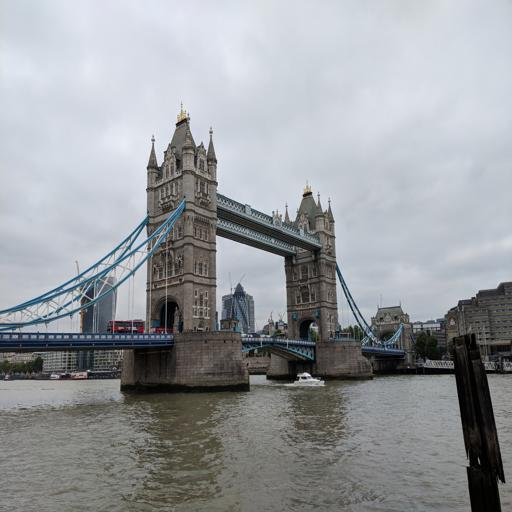
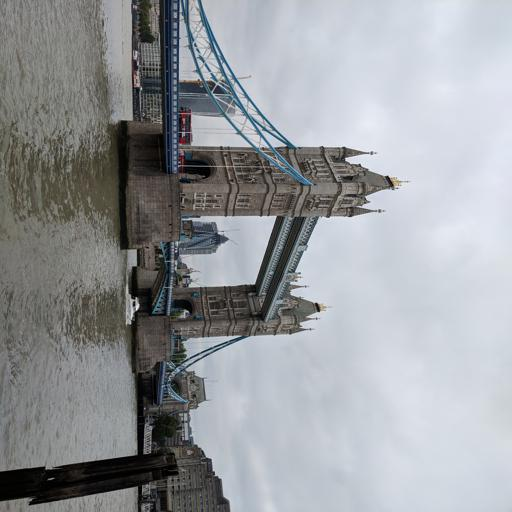
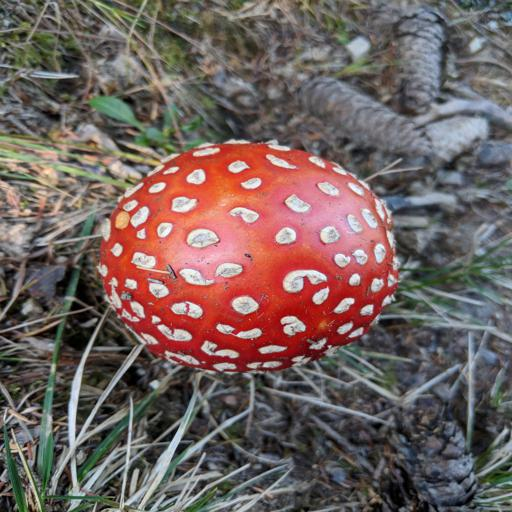
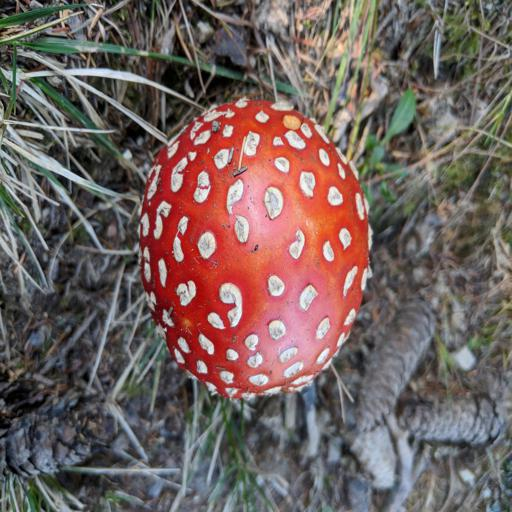
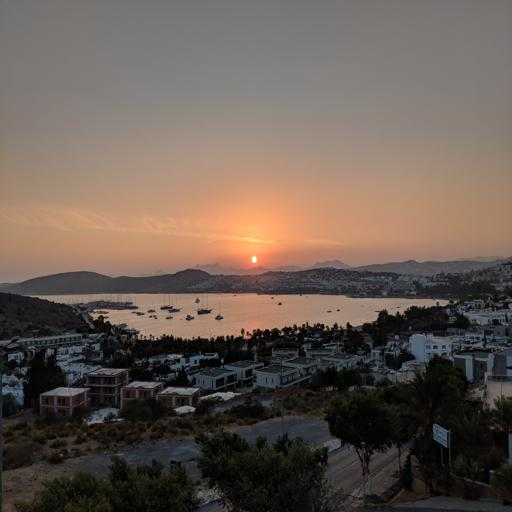
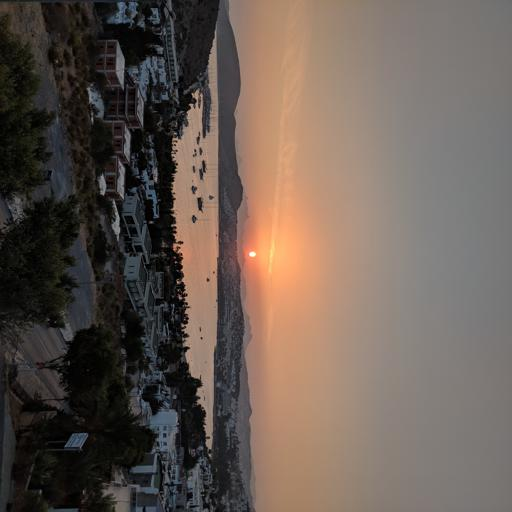
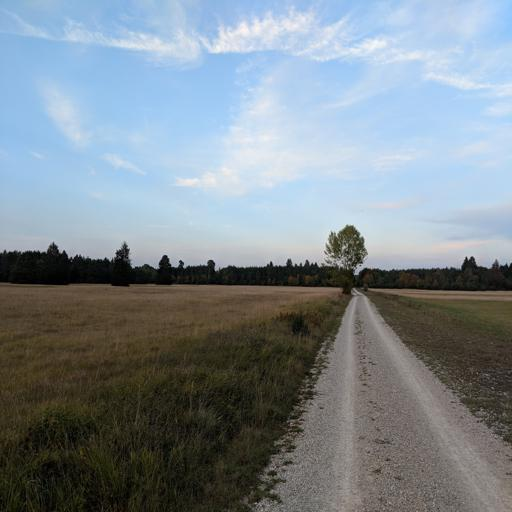
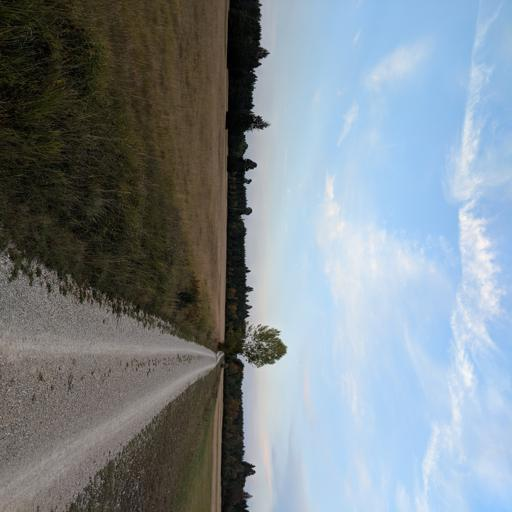
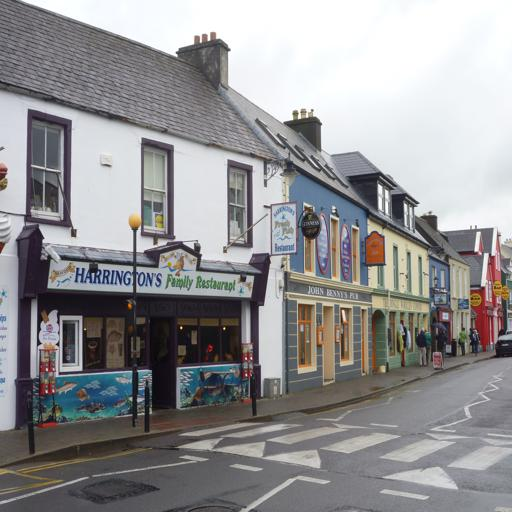
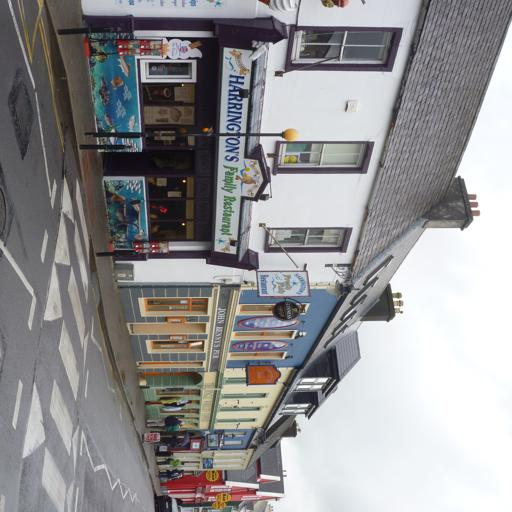
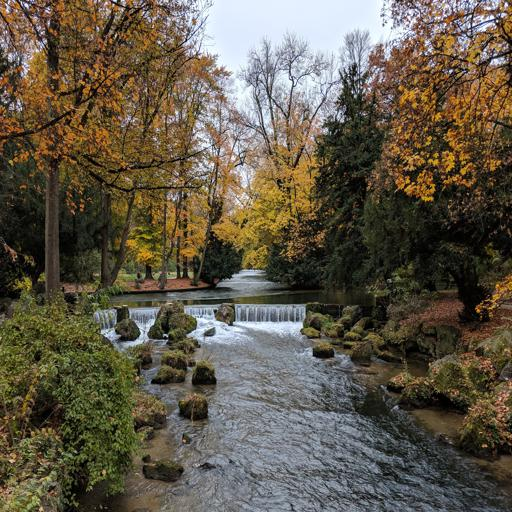
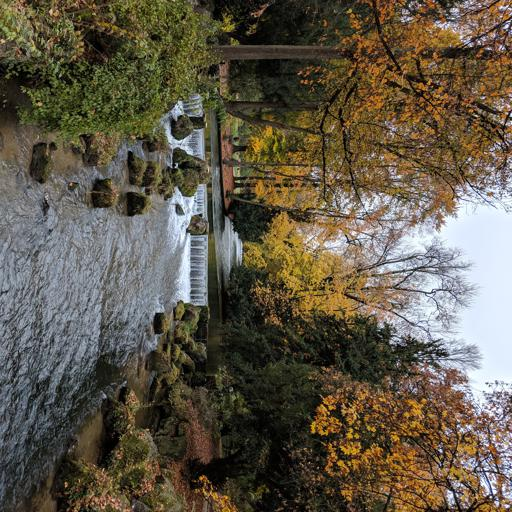
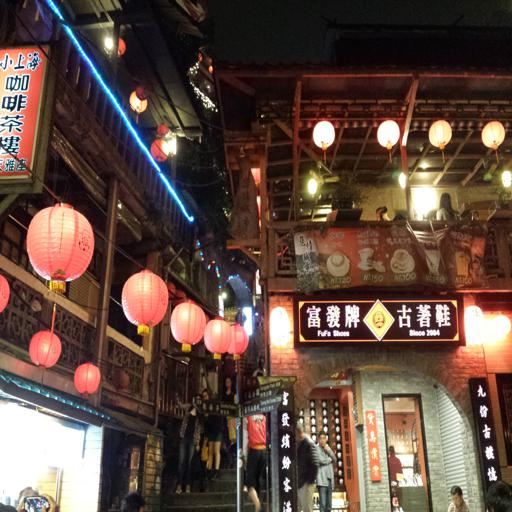
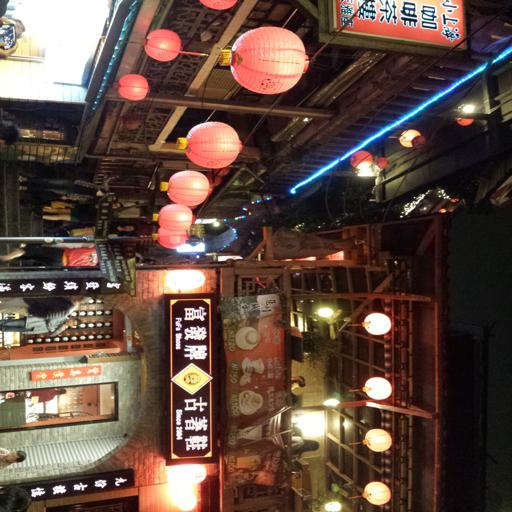
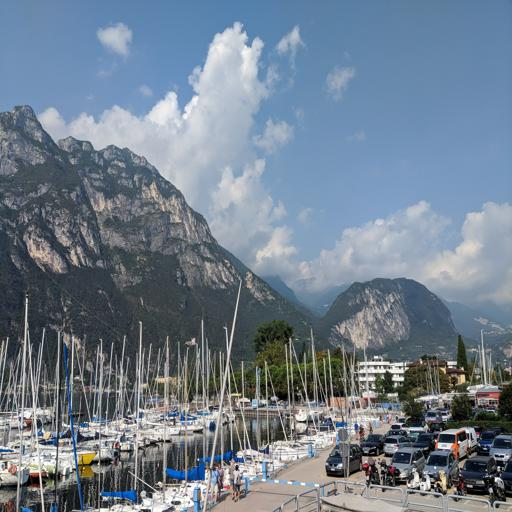
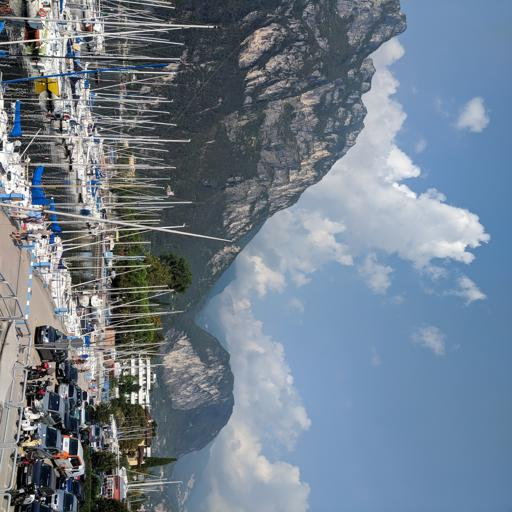
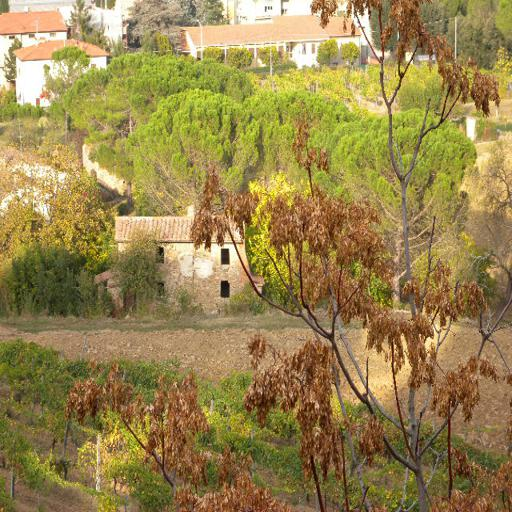
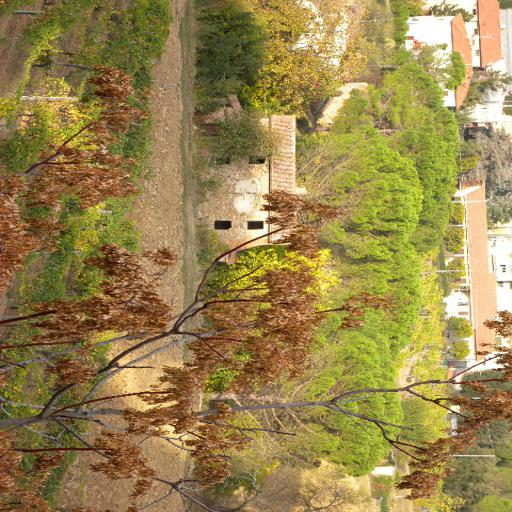
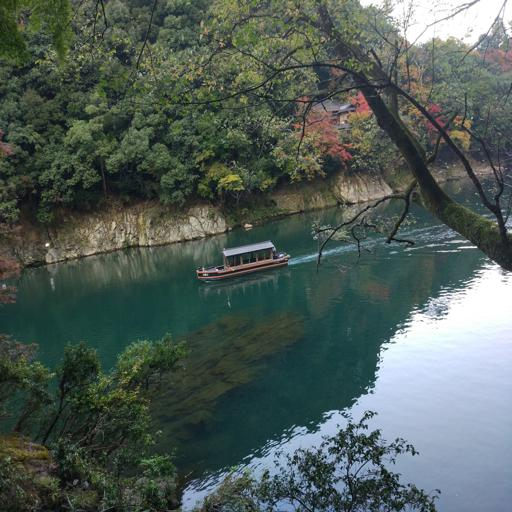
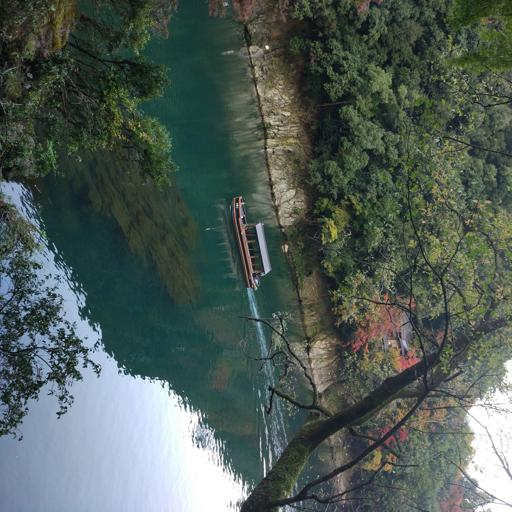

In [432]:
# Printing the dataframe
HTML(df[["Image_name","Resized Image","Rotated Image",'MetadataInfo']].to_html(formatters={'Resized Image': image_formatter_unrotated, 'Rotated Image':image_formatter_rotated}, escape=False))

In [434]:
pip freeze > /content/drive/MyDrive/AirProbe/requirements.txt